In [1]:
import requests
from bs4 import BeautifulSoup

# アクセスしたいWebサイトのURL
url = 'https://www.data.jma.go.jp/stats/etrn/view/daily_s1.php?prec_no=44&block_no=47662&year=2023&month=12&day=&view='

# Webサーバにリクエストを出す
r = requests.get(url)

# HTMLソースをBeautifulSoupオブジェクトに変換
soup = BeautifulSoup(r.text, 'html.parser')
print(type(soup))

/Users/takayuki/dsfinalpro/myenv/lib/python3.9/site-packages/urllib3/__init__.py:34: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


<class 'bs4.BeautifulSoup'>


In [2]:
detas = soup.find_all('tr', style="text-align:right;")
for index, data in enumerate(detas):
    a_tag = data.find('a')
    if a_tag:
        day = a_tag.text
        print(day)
    else:
        print("aタグが見つかりませんでした")

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31


In [ ]:
import sqlite3

# DBファイルを保存するためのファイルパス
path = '/Users/takayuki/Lecture/ds-programming'

# DBファイル名
db_name = 'sleeplv.sqlite'

# DBに接続する
con = sqlite3.connect(path + '/' + db_name)

# SQLを実行するためのオブジェクトを取得
cur = con.cursor()

# テーブルを作成するSQL
sql_create_table = '''
    CREATE TABLE IF NOT EXISTS sleeplv (
        day TEXT,
        hpa REAL,
        Precipitation TEXT,
        temp_av REAL,
        temp_max REAL,
        temp_min REAL,
        humidity_av TEXT,
        suntime TEXT
    );
'''

# CREATE TABLE IF NOT EXISTS ensures that the table is created only if it doesn't already exist
cur.execute(sql_create_table)

In [8]:
from bs4 import BeautifulSoup
import requests #HTTP操作用
import time


# アクセスしたいWebサイトのURL
url = 'https://www.data.jma.go.jp/stats/etrn/view/daily_s1.php?prec_no=44&block_no=47662&year=2023&month=12&day=&view='

# Webサーバにリクエストを出す．レスポンスを変数に格納しておく
r = requests.get(url)


soup = BeautifulSoup(r.text, 'html.parser') # HTMLソースをBeautifulSoupオブジェクトに変換する（プログラムで扱いやすくするため）
print(type(soup))



detas = soup.find_all('tr', style="text-align:right;")
index = 0
while index < len(detas):
    a_tag = detas[index].find('a')
    if a_tag:
        day = a_tag.text
        print(day)
        temp = detas[index].find_all('td', class_="data_0_0")
        if temp:
            hpa = temp[0].text
            Precipitation = temp[2].text
            temp_av = temp[7].text
            temp_max = temp[8].text
            temp_min = temp[9].text
            humidity_av = temp[10].text
            humidity_min = temp[11].text
            suntime = temp[17].text
            print(hpa,Precipitation,temp_av,temp_max,humidity_av,humidity_min,suntime)
        else:
            print("必要な要素が見つかりませんでした")
    else:
        print("aタグが見つかりませんでした")
    index += 1


import sqlite3


!pwd


# wDBファイルを保存するためのファイルパス
path = '/Users/takayuki/Lecture/ds-programming'

# DBファイル名
db_name = 'sleeplv.sqlite'

# DBに接続する
con = sqlite3.connect(path + db_name)

# SQLを実行するためのオブジェクトを取得
cur = con.cursor()

# テーブルを作成するSQL
#  CREATE TABLE テーブル名（カラム名 型，...）;
sql_create_table_DSprogHW = '''
    CREATE TABLE sleeplv (
        day INTEGER,
        hpa REAL,
        Precipitation TEXT,
        temp_av REAL,
        temp_max REAL,
        temp_min IREAL,
        humidity_av TEXT,
        suntime TEXT
    );
'''


# # 4．SQLを実行する

<class 'bs4.BeautifulSoup'>
1
1012.3 -- 6.4 54 2.0 4.0 --
2
1015.6 -- 4.1 60 1.7 3.1 --
3
1015.5 -- 4.1 58 2.5 6.3 --
4
1018.2 -- 4.7 53 1.9 3.8 --
5
1016.3 0.0 5.7 64 1.9 3.8 --
6
1008.8 1.0 7.1 77 2.2 4.8 --
7
1004.1 -- 7.1 60 2.7 8.2 --
8
1016.3 -- 6.0 49 2.5 4.8 --
9
1017.0 -- 6.4 66 1.6 3.3 --
10
1018.5 -- 7.2 65 1.4 4.1 --
11
1019.6 0.5 11.3 74 2.1 4.5 --
12
1007.6 15.5 9.7 92 2.1 4.7 --
13
1021.2 -- 7.3 52 2.8 5.0 --
14
1024.3 -- 6.5 62 1.7 3.3 --
15
1011.8 1.0 7.1 82 2.1 8.4 --
16
1001.4 0.0 10.8 71 3.0 8.7 --
17
1007.5 -- 5.9 36 3.5 7.2 --
18
1020.5 -- 3.8 36 2.6 5.5 --
19
1020.2 -- 3.4 53 1.6 3.1 --
20
1008.7 -- 4.6 59 1.6 3.5 --
21
1008.3 -- 3.3 41 2.8 6.4 --
22
1015.0 -- 1.5 38 2.6 5.9 --
23
1023.8 -- 0.1 47 1.8 4.4 --
24
1023.9 -- 2.0 55 1.6 2.9 --
25
1018.2 -- 1.0 56 1.7 3.6 --
26
1019.2 -- 2.6 58 2.4 5.8 --
27
1022.5 -- 4.3 50 2.8 6.2 --
28
1022.6 -- 4.4 56 1.9 3.3 --
29
1018.2 -- 2.2 61 1.6 3.4 --
30
1017.3 -- 4.4 63 1.6 4.7 --
31
1004.0 1.5 5.8 79 1.4 3.5 --
/Users/tak

In [14]:
pip install pandas

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.2/61.2 kB 3.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.0/11.0 MB 53.0 MB/s eta 0:00:00 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.0/14.0 MB 49.7 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 502.5/502.5 kB 36.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 346.6/346.6 kB 30.4 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [15]:
import pandas as pd

In [16]:
#csvファイルの読み込み
df=pd.read_csv('/Users/takayuki/dsfinalpro/sleeplv.csv')

In [17]:
df

,sleep_time,falling asleep,utouto,suyasuya,gussuri,day
0,356,11,12,62,26,1
1,411,24,24,22,54,2
2,510,11,30,42,28,3
3,342,41,51,19,30,4
4,367,32,72,19,9,5
5,423,29,13,44,43,6
6,456,43,27,23,50,7
7,471,27,15,27,58,8
8,428,26,22,17,61,9
9,329,19,34,51,15,10


In [22]:
import sqlite3
import os  # osモジュールのインポートを追加

# DBファイルを保存するためのディレクトリパス
path = '/Users/takayuki/dsfinalpro/'

# DBファイル名
db_name = 'sleeplv_csv.sqlite'

# DBに接続する（存在しない場合は作成される）
con = sqlite3.connect(os.path.join(path, db_name))

# SQLを実行するためのオブジェクトを取得
cur = con.cursor()

# テーブルを作成するSQL
sql_create_table = '''
    CREATE TABLE IF NOT EXISTS sleeplv (
        sleep_time TEXT,
        falling_asleep REAL,
        utouto TEXT,
        suyasuya REAL,
        gussuri REAL,
        day REAL
    );
'''

# CREATE TABLE IF NOT EXISTS ensures that the table is created only if it doesn't already exist
cur.execute(sql_create_table)

# 変更をコミットして接続を閉じる
con.commit()
con.close()


In [23]:
pip install pandas matplotlib


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 157.6/157.6 kB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.5/7.5 MB 48.9 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 242.4/242.4 kB 19.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.8/2.8 MB 41.6 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.2/66.2 kB 8.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 13.0 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 103.1/103.1 kB 6.8 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


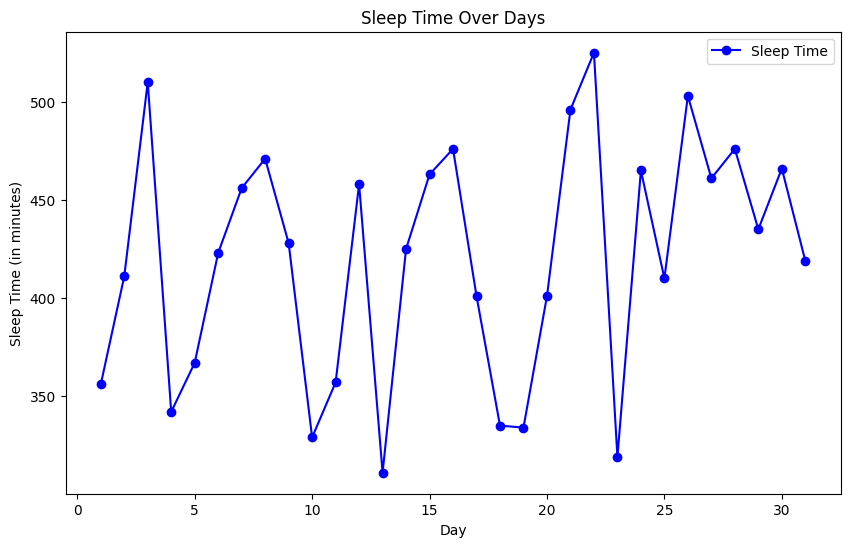

In [30]:
import pandas as pd
import matplotlib.pyplot as plt

# CSVファイルのパス
csv_file_path = '/Users/takayuki/dsfinalpro/sleeplv.csv'

# CSVファイルの読み込み
df = pd.read_csv(csv_file_path)

# グラフの描画
plt.figure(figsize=(10, 6))  # グラフのサイズを設定

# day列をx軸に、sleep_time列をy軸にして折れ線グラフを描画
plt.plot(df['day'], df['sleep_time'], marker='o', linestyle='-', color='b', label='Sleep Time')

# グラフにタイトルや軸ラベルを追加
plt.title('Sleep Time Over Days')
plt.xlabel('Day')
plt.ylabel('Sleep Time (in minutes)')

# 凡例の表示
plt.legend()

# グラフの表示
plt.show()


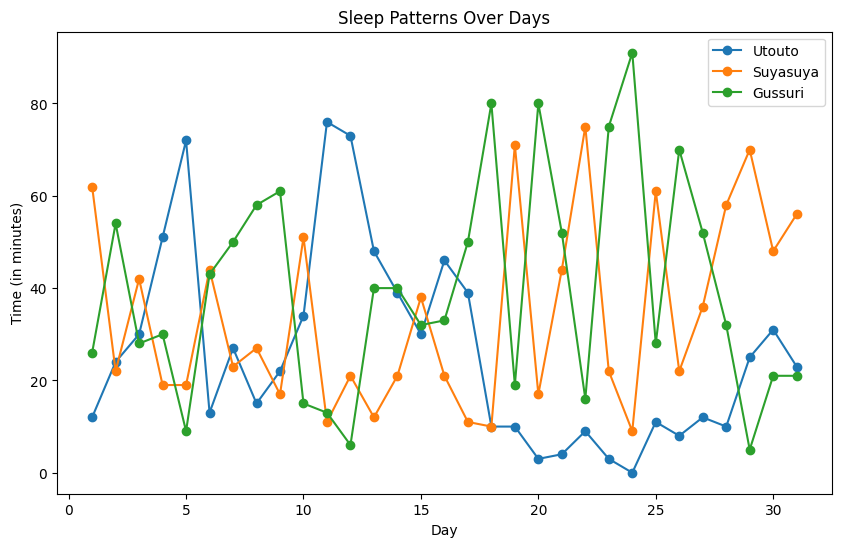

In [31]:
import pandas as pd
import matplotlib.pyplot as plt

# CSVファイルのパス
csv_file_path = '/Users/takayuki/dsfinalpro/sleeplv.csv'

# CSVファイルの読み込み
df = pd.read_csv(csv_file_path)

# グラフの描画
plt.figure(figsize=(10, 6))  # グラフのサイズを設定

# day列をx軸に、他の列をy軸にして折れ線グラフを描画
plt.plot(df['day'], df['utouto'], marker='o', linestyle='-', label='Utouto')
plt.plot(df['day'], df['suyasuya'], marker='o', linestyle='-', label='Suyasuya')
plt.plot(df['day'], df['gussuri'], marker='o', linestyle='-', label='Gussuri')

# グラフにタイトルや軸ラベルを追加
plt.title('Sleep Patterns Over Days')
plt.xlabel('Day')
plt.ylabel('Time (in minutes)')

# 凡例の表示
plt.legend()

# グラフの表示
plt.show()
